# Upsample the dataset
- Takes the original dataframe and returns upsampled version

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [45]:
pd_filter = pd.read_csv('./data/filtered_data3.csv')
pd_filter

,Age,BIO_ExtinctionIntensity (%),BIO_OriginationIntensity(%),BIO_Difference_Cubic,SEA_Modern land sea level (C = 176.6 106km2/km),TEM_GAT,TEM_dT,CO2_pCO2 (ppm),O2_Mid O2%,O2_Range_Normalized,...,SR_Range_Normalized,LIP_LIP_PDF,MAG_INT_mean,MAG_INT_std,MAG_POL_FREQUENCY,MAG_POL_FREQUENCY.3,ZIR_Count_PDF_d18O,ZIR_Interpolated_mean_d18O,ZIR_Count_PDF_Hf,ZIR_Interpolated_mean_Hf
0,252.00,1.000000,0.000000,0.506887,0.263456,0.805210,0.032628,1.000000,1.000000,0.930485,...,0.969434,0.600,0.008044,0.000039,0.090909,0.1000,0.017316,0.499154,0.752941,0.660253
1,251.95,1.000000,0.000000,0.506988,0.263456,0.805657,0.032042,1.000000,0.998872,0.931869,...,0.934624,0.610,0.008299,0.000033,0.095455,0.1020,0.017316,0.499154,0.694118,0.670752
2,251.90,1.000000,0.000000,0.507089,0.263456,0.806103,0.031457,1.000000,0.997744,0.933254,...,0.899814,0.620,0.008553,0.000026,0.100000,0.1040,0.017316,0.499154,0.694118,0.670752
3,251.85,1.000000,0.000000,0.507190,0.263456,0.806549,0.030872,1.000000,0.996615,0.934638,...,0.868058,0.630,0.008828,0.000025,0.104545,0.1060,0.017316,0.499154,0.694118,0.670752
4,251.80,1.000000,0.000000,0.507291,0.263456,0.806995,0.030287,1.000000,0.995487,0.936023,...,0.836303,0.640,0.009102,0.000025,0.109091,0.1080,0.017316,0.499154,0.694118,0.670752
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5036,0.20,0.002184,0.141072,0.912523,0.012354,0.022142,0.963248,0.058102,0.003722,0.152117,...,0.040715,0.016,0.586923,0.117646,0.154545,0.3720,0.333333,0.662915,0.082353,0.826446
5037,0.15,0.002184,0.141072,0.910671,0.012417,0.023525,0.960951,0.058095,0.002792,0.151117,...,0.044493,0.012,0.531968,0.073930,0.150000,0.3715,0.350649,0.653437,0.082353,0.826446
5038,0.10,0.002184,0.141072,0.908819,0.012480,0.024909,0.958654,0.058088,0.001861,0.150116,...,0.048271,0.008,0.477013,0.030214,0.145455,0.3710,0.372294,0.638354,0.082353,0.826446
5039,0.05,0.002184,0.141072,0.906966,0.012543,0.026293,0.956357,0.058081,0.000931,0.149115,...,0.040902,0.004,0.377562,0.030358,0.140909,0.3705,0.372294,0.638354,0.082353,0.826446


In [ ]:
# Create a new index with the desired sampling period, ensuring it includes the maximum Age
# Define the upsample step as a parameter
upsample_step = 0.1  # Replace with the desired step size for upsampling
new_index = np.arange(pd_filter.index.min(), pd_filter.index.max() + upsample_step, upsample_step)

# Reindex the dataframe and interpolate
pd_filter_upsampled = pd_filter.reindex(new_index).interpolate(method='linear')

# Reset the index
pd_filter_upsampled.reset_index(inplace=True)
pd_filter_upsampled.drop(columns=['index'], inplace=True)

In [47]:
pd_filter_upsampled


,Age,BIO_ExtinctionIntensity (%),BIO_OriginationIntensity(%),BIO_Difference_Cubic,SEA_Modern land sea level (C = 176.6 106km2/km),TEM_GAT,TEM_dT,CO2_pCO2 (ppm),O2_Mid O2%,O2_Range_Normalized,...,SR_Range_Normalized,LIP_LIP_PDF,MAG_INT_mean,MAG_INT_std,MAG_POL_FREQUENCY,MAG_POL_FREQUENCY.3,ZIR_Count_PDF_d18O,ZIR_Interpolated_mean_d18O,ZIR_Count_PDF_Hf,ZIR_Interpolated_mean_Hf
0,252.000,1.000000,0.000000,0.506887,0.263456,0.805210,0.032628,1.000000,1.000000,0.930485,...,0.969434,0.6000,0.008044,0.000039,0.090909,0.10000,0.017316,0.499154,0.752941,0.660253
1,251.995,1.000000,0.000000,0.506897,0.263456,0.805255,0.032569,1.000000,0.999887,0.930623,...,0.965953,0.6010,0.008069,0.000039,0.091364,0.10020,0.017316,0.499154,0.747059,0.661303
2,251.990,1.000000,0.000000,0.506908,0.263456,0.805300,0.032511,1.000000,0.999774,0.930761,...,0.962472,0.6020,0.008095,0.000038,0.091818,0.10040,0.017316,0.499154,0.741176,0.662353
3,251.985,1.000000,0.000000,0.506918,0.263456,0.805344,0.032452,1.000000,0.999662,0.930900,...,0.958991,0.6030,0.008120,0.000037,0.092273,0.10060,0.017316,0.499154,0.735294,0.663403
4,251.980,1.000000,0.000000,0.506928,0.263456,0.805389,0.032394,1.000000,0.999549,0.931038,...,0.955510,0.6040,0.008146,0.000037,0.092727,0.10080,0.017316,0.499154,0.729412,0.664453
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50396,0.020,0.002184,0.141072,0.905855,0.012581,0.027123,0.954978,0.058076,0.000372,0.148514,...,0.040902,0.0016,0.377562,0.030358,0.138182,0.37020,0.372294,0.640169,0.082353,0.826446
50397,0.015,0.002184,0.141072,0.905670,0.012587,0.027262,0.954749,0.058076,0.000279,0.148414,...,0.040902,0.0012,0.377562,0.030358,0.137727,0.37015,0.372294,0.640472,0.082353,0.826446
50398,0.010,0.002184,0.141072,0.905484,0.012594,0.027400,0.954519,0.058075,0.000186,0.148314,...,0.040902,0.0008,0.377562,0.030358,0.137273,0.37010,0.372294,0.640774,0.082353,0.826446
50399,0.005,0.002184,0.141072,0.905299,0.012600,0.027539,0.954289,0.058074,0.000093,0.148214,...,0.040902,0.0004,0.377562,0.030358,0.136818,0.37005,0.372294,0.641077,0.082353,0.826446


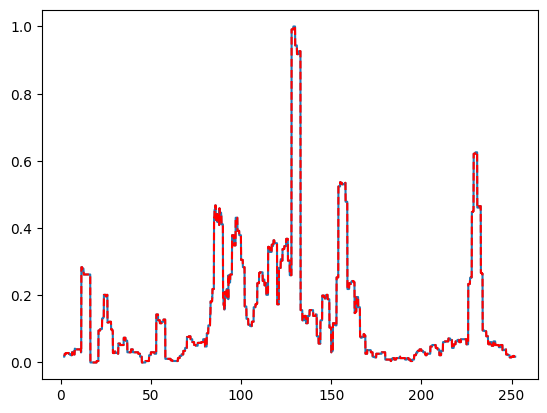

In [49]:
N = 5000  # Replace with the desired number of samples
plt.plot(pd_filter_upsampled['Age'][0:N*10], pd_filter_upsampled['ZIR_Count_PDF_d18O'][0:N*10])
plt.plot(pd_filter['Age'][0:N], pd_filter['ZIR_Count_PDF_d18O'][0:N], color='red', linestyle='dashed')

In [51]:
pd_filter_upsampled.to_csv('./data/filtered_data3_0.005.csv', index=False)